In [81]:
import tensorflow
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [82]:
(X_train,y_train),(X_test,y_test) = boston_housing.load_data()

In [83]:
X_train.shape

(404, 13)

In [84]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [85]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [86]:
# Scale target variable
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

In [87]:
model = Sequential([
    Dense(128,activation='relu',input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64,activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32,activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(1)
    
])

In [88]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               1792      
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_16 (Batc (None, 64)                256       
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)               

In [89]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [90]:
# Set early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [91]:
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=32,callbacks=[early_stopping], verbose=1)

Epoch 1/100
13/13 [==============================] - 1s 13ms/step - loss: 3.3391 - mse: 3.3391 - val_loss: 0.9399 - val_mse: 0.9399
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 1.9608 - mse: 1.9608 - val_loss: 0.8527 - val_mse: 0.8527
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 1.5832 - mse: 1.5832 - val_loss: 0.8207 - val_mse: 0.8207
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.9826 - mse: 0.9826 - val_loss: 0.7429 - val_mse: 0.7429
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 1.1357 - mse: 1.1357 - val_loss: 0.7168 - val_mse: 0.7168
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.9494 - mse: 0.9494 - val_loss: 0.6612 - val_mse: 0.6612
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.8633 - mse: 0.8633 - val_loss: 0.6290 - val_mse: 0.6290
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6880 - 

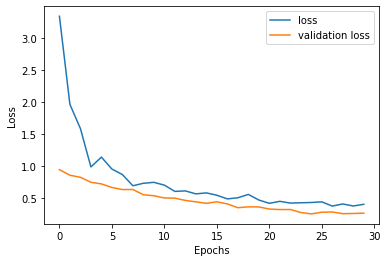

In [92]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

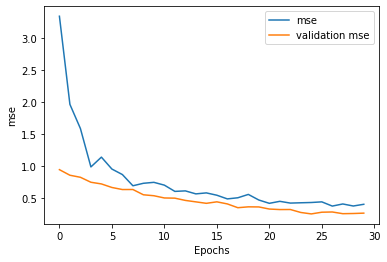

In [93]:
plt.plot(history.history['mse'],label='mse')
plt.plot(history.history['val_mse'],label='validation mse')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.show()

In [94]:
# Evaluate the model

test_loss , test_mse = model.evaluate(X_test,y_test)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mse:.4f}")

4/4 [==============================] - 0s 2ms/step - loss: 0.2478 - mse: 0.2478
Test Loss: 0.2478, Test MAE: 0.2478


In [95]:
# r2 score
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

# Inverse transform predictions
y_test_original = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_original = y_scaler.inverse_transform(y_pred).flatten()

r2 = r2_score(y_test_original,y_pred_original)

print(r2)

0.7481155493447488
